In [3]:
import torch 

torch.cuda.is_available()

False

In [4]:
%pip install torchvision

Note: you may need to restart the kernel to use updated packages.


In [5]:
import torch 
from torch import nn 
from torch.utils.data import DataLoader
from torchvision import datasets
from torchvision.transforms import ToTensor
import matplotlib.pyplot as plt
import numpy as np

In [6]:
training_data = datasets.FashionMNIST(
    root="data",
    train=True, 
    download=True, 
    transform=ToTensor()
)

test_data = datasets.FashionMNIST(
    root="data",
    train=False, 
    download=True, 
    transform=ToTensor()
)

In [7]:
labels_map = {
    0: "T-Shirt",
    1: "Trouser",
    2: "Pullover",
    3: "Dress",
    4: "Coat",
    5: "Sandal",
    6: "Shirt",
    7: "Sneaker",
    8: "Bag",
    9: "Ankle Boot",
}

In [8]:
training_data[0][0].shape

torch.Size([1, 28, 28])

In [9]:
len(training_data)

60000

In [10]:
test_data[0][0].shape

torch.Size([1, 28, 28])

In [11]:
len(test_data)

10000

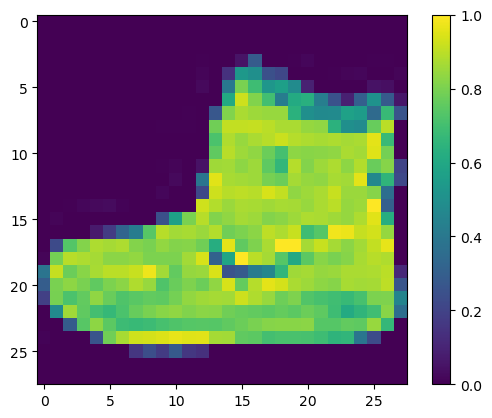

In [12]:
plt.figure()
plt.imshow(training_data[0][0].squeeze())
plt.colorbar()
plt.grid(False)
plt.show()

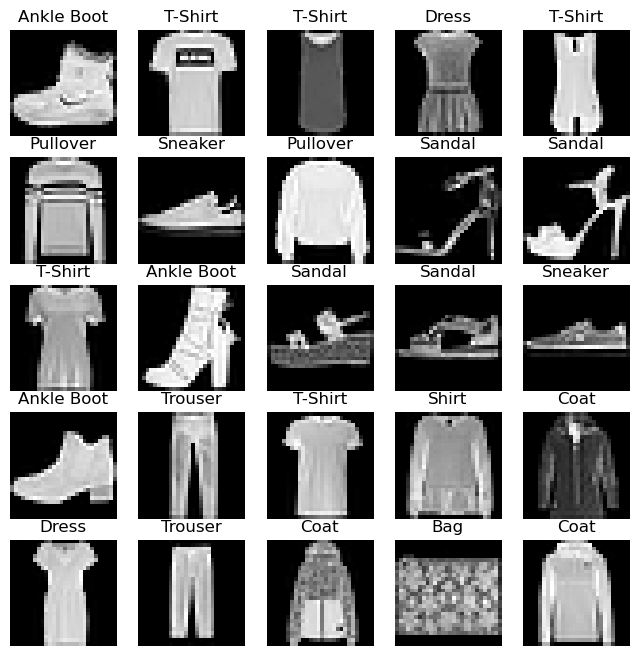

In [13]:
figure = plt.figure(figsize=(8, 8))
cols, rows = 5, 5
for i in range(1, cols * rows + 1):
    sample_idx = i-1
    img, label = training_data[sample_idx]
    figure.add_subplot(rows, cols, i)
    plt.title(labels_map[label])
    plt.axis("off")
    plt.imshow(img.squeeze(), cmap="gray")
plt.show()

In [14]:
batch_size = 64 

train_dataloader = DataLoader(training_data, batch_size=batch_size)
test_dataloader = DataLoader(test_data, batch_size=batch_size)

for X, y in test_dataloader:
    print("Shape of X [N, C, H, W]: ", X.shape)
    print("Shape of y: ", y.shape, y.dtype)
    break

Shape of X [N, C, H, W]:  torch.Size([64, 1, 28, 28])
Shape of y:  torch.Size([64]) torch.int64


In [15]:
model = nn.Sequential(
    nn.Linear(32, 64),
    nn.ReLU(),
    nn.Linear(64,64),
    nn.ReLU(),
    nn.Linear(64,10),
    nn.Softmax()
)

In [30]:
device = "cuda" if torch.cuda.is_available() else "cpu"
print(f"Using {device} device")

class NeuralNetwork(nn.Module):
    def __init__(self):
        super(NeuralNetwork, self).__init__()
        self.flatten = nn.Flatten()
        self.linear_relu_stack = nn.Sequential(
            nn.Linear(28*28, 512),
            nn.ReLU(),
            nn.Linear(512, 512),
            nn.ReLU(),
            nn.Linear(512, 10)
        )
    
    def forward(self, x):
        x = self.flatten(x)
        logits = self.linear_relu_stack(x)
        return logits
    
model = NeuralNetwork().to(device)

Using cpu device


In [21]:
print(model)

NeuralNetwork(
  (flatten): Flatten(start_dim=1, end_dim=-1)
  (linear_relu_stack): Sequential(
    (0): Linear(in_features=784, out_features=512, bias=True)
    (1): ReLU()
    (2): Linear(in_features=512, out_features=512, bias=True)
    (3): ReLU()
    (4): Linear(in_features=512, out_features=10, bias=True)
  )
)


In [22]:
loss_fn = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(model.parameters(), lr=0.003)

In [23]:
def train(dataloader, model, loss_fn, optimizer):
    size = len(dataloader.dataset)
    for batch, (X, y) in enumerate(dataloader):
        X, y = X.to(device), y.to(device)

        pred = model(X)
        loss = loss_fn(pred, y)

        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

        if batch % 100 == 0:
            loss, current = loss.item(), batch * len(X)
            print(f"loss: {loss:>7f}  [{current:>5d}/{size:>5d}]")

In [27]:
def test(dataloader, model, loss_fn):
    size = len(dataloader.dataset)
    num_batches = len(dataloader)
    model.eval()
    test_loss, correct = 0, 0
    with torch.no_grad():
        for X, y in dataloader:
            X, y = X.to(device), y.to(device)
            pred = model(X)
            test_loss += loss_fn(pred, y).item()
            correct += (pred.argmax(1) == y).type(torch.float).sum().item()
    
    test_loss /= num_batches
    correct /= size
    print(f"Test Error: \n Accuracy: {(100*correct):>0.1f}%, Avg loss: {test_loss:>8f}\n")

In [28]:
epochs = 5
for t in range(epochs):
    print(f"Epoch {t+1}\n-------------------------------")
    train(train_dataloader, model, loss_fn, optimizer)
    test(test_dataloader, model, loss_fn)
print("Done!")

Epoch 1
-------------------------------
loss: 2.302426  [    0/60000]
loss: 2.296197  [ 6400/60000]
loss: 2.298313  [12800/60000]
loss: 2.299215  [19200/60000]
loss: 2.303050  [25600/60000]
loss: 2.299516  [32000/60000]
loss: 2.296677  [38400/60000]
loss: 2.295612  [44800/60000]
loss: 2.301771  [51200/60000]
loss: 2.297772  [57600/60000]
Test Error: 
 Accuracy: 15.1%, Avg loss: 2.300038

Epoch 2
-------------------------------
loss: 2.302426  [    0/60000]
loss: 2.296197  [ 6400/60000]
loss: 2.298313  [12800/60000]
loss: 2.299215  [19200/60000]
loss: 2.303050  [25600/60000]
loss: 2.299516  [32000/60000]
loss: 2.296677  [38400/60000]
loss: 2.295612  [44800/60000]
loss: 2.301771  [51200/60000]
loss: 2.297772  [57600/60000]
Test Error: 
 Accuracy: 15.1%, Avg loss: 2.300038

Epoch 3
-------------------------------
loss: 2.302426  [    0/60000]
loss: 2.296197  [ 6400/60000]
loss: 2.298313  [12800/60000]
loss: 2.299215  [19200/60000]
loss: 2.303050  [25600/60000]
loss: 2.299516  [32000/60000

In [31]:
with torch.no_grad():
    predictions = [model(X.to(device)[0] for X, y in test_data)]

AttributeError: 'generator' object has no attribute 'flatten'

In [ ]:
predictions[0]